Dataset- https://www.kaggle.com/datasets/blastchar/telco-customer-churn

Description:
The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to 7,043 customers in California. It presents a comprehensive view of customer behavior and churn patterns within a telecommunications company. The dataset includes a wide range of features such as customer demographics (e.g., gender, age, and marital status), services subscribed (e.g., internet service, phone service), contract details (e.g., contract type, tenure), billing information (e.g., total charges), and customer satisfaction indicators (e.g., tech support availability). This dataset is invaluable for businesses seeking to understand and mitigate customer attrition, a critical factor impacting revenue and growth in the telecommunications industry.

Customer churn is a pressing issue for telecommunications companies, as retaining existing customers is often more cost-effective than acquiring new ones. High churn rates can lead to substantial revenue losses and increased marketing expenses. Understanding and mitigating customer churn is crucial for the sustainability and growth of any company. The significance of this study could be:
- Identifying Churn Predictors
- Personalizing Retention Efforts
- Improving Customer Experience
- Optimizing Contract Offerings
- Enhancing Predictive Analytics

In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# Read dataframe using pandas

df = pd.read_csv ('telco_customer.csv')

In [3]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
# check the data types of all columns

df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Descriptive statistics: for numerical columns

df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


Observed that column- Total Charges was not giving any results. 

In [7]:
# Ensure 'TotalCharges' is numeric and handle missing or invalid entries

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
# Checking all the rows where total charges is null

df[np.isnan(df['TotalCharges'])].shape

(11, 21)

In [9]:
# Checking all the rows where tenure is 0

df[df['tenure'] == 0].shape

(11, 21)

In [10]:
# Compare the entries with tenure = 0 and TotalCharges = 0.
# Both are the same. So, total charges are nan where tenure=0

set(df[df['tenure'] == 0].index) == set(df[np.isnan(df['TotalCharges'])].index)

True

In [11]:
# Dropping values where tenure=0 

df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Index([], dtype='int64')

In [12]:
# Checking if there's any other null values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.shape

(7032, 21)

In [14]:
# Descriptive Statistics
df[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


The average tenure in the dataset is 32.4 months, the mean monthly charges are US\\$64.80, and the mean total charges are US\\$2,283.3.

In [15]:
# Checking if there are any repeat customerIDs

df["customerID"].duplicated().sum()

0

In [16]:
# Dropping customerID as they will not be used in the analysis

df.drop('customerID', axis=1, inplace=True)

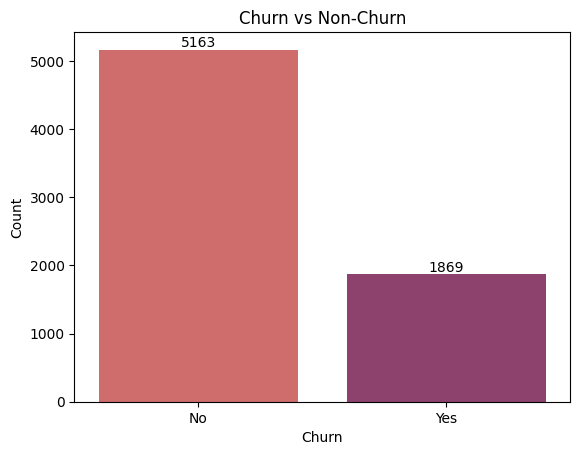

In [17]:
# Plot churn vs non churn

ax = sns.countplot(x='Churn', data=df, palette='flare')
for container in ax.containers:
    ax.bar_label(container)
plt.title("Churn vs Non-Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

This bar chart shows the distribution of customers who churned versus those who did not churn. Out of the total customers, 5,163 did not churn, while 1,869 churned. The number of non-churned customers is significantly higher than churned customers. So, we can say that it is an imbalanced dataset.

In [18]:
# Converting senior citizen from numerical to categorical feature  
df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}, inplace=True)
df['SeniorCitizen'].value_counts()

SeniorCitizen
No     5890
Yes    1142
Name: count, dtype: int64

Out of the total customers, 5,890 are not senior citizens, while 1,142 are senior citizens.

Exploratory Data Analysis

In [19]:
# Defining columns for EDA

EDA_columns = ['gender', 'SeniorCitizen', 'PhoneService', 'MultipleLines','InternetService', 
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
               'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling']

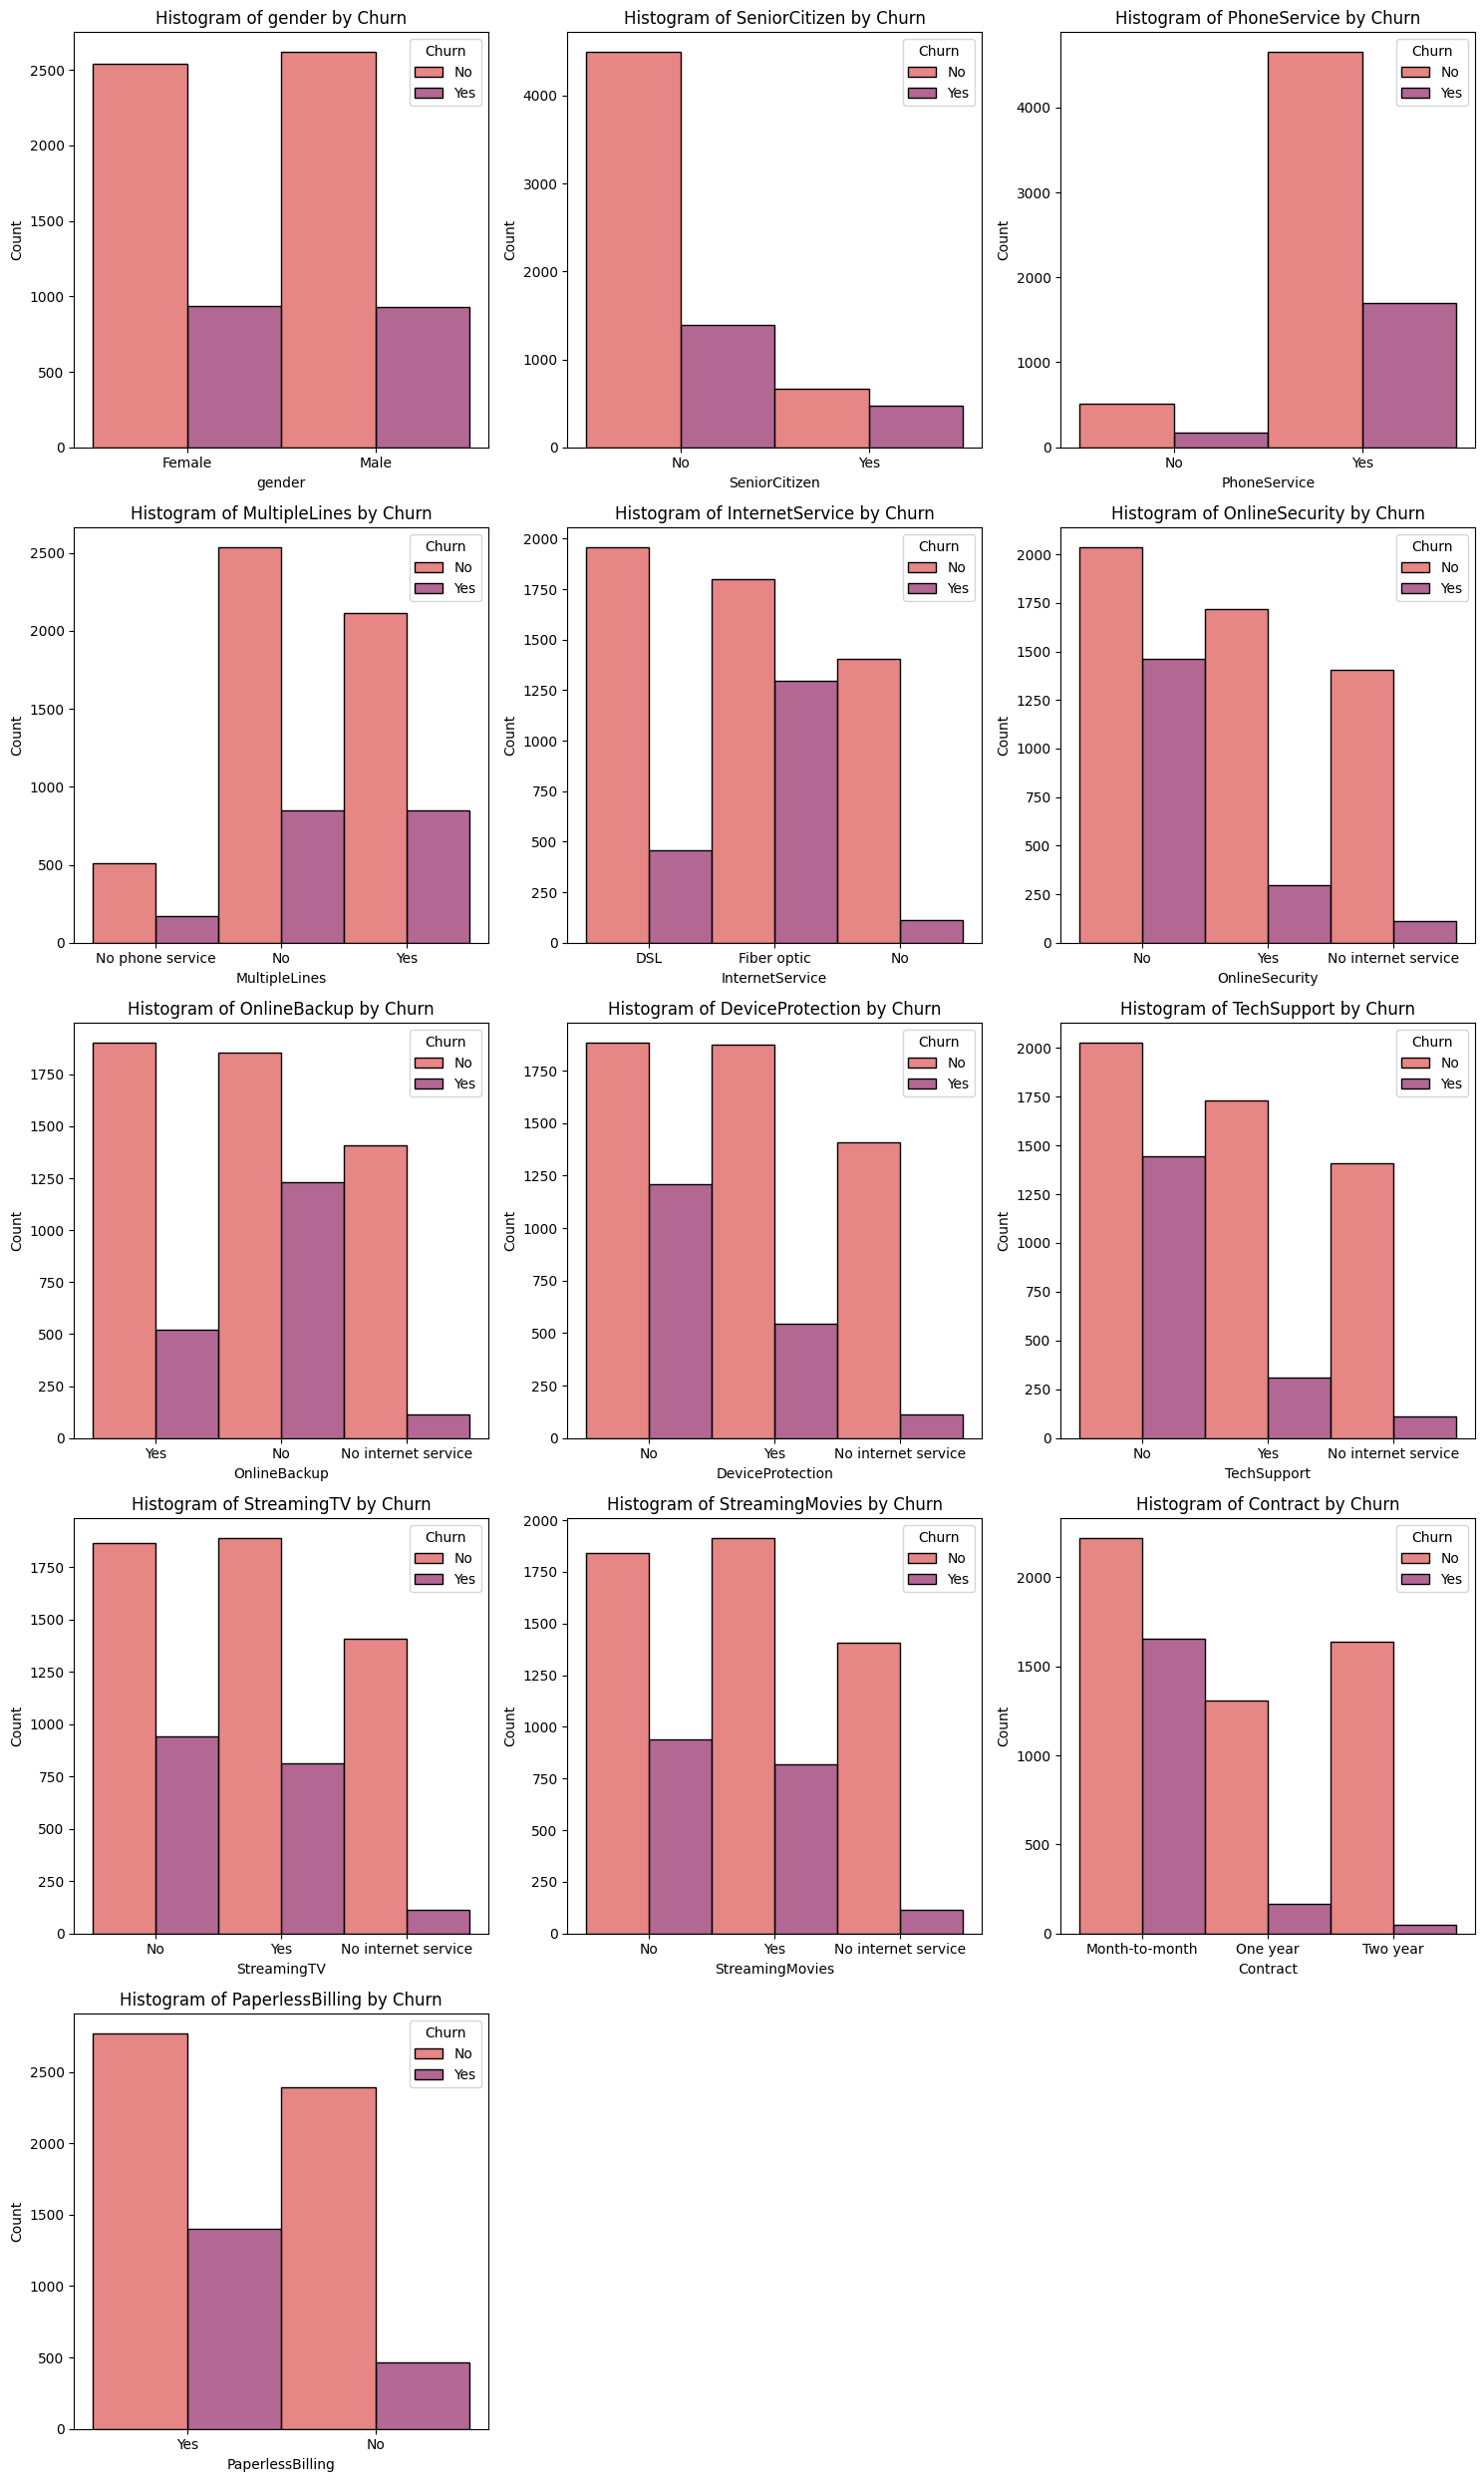

In [20]:
# Function that will give histograms for columns defined above

num_cols = len(EDA_columns)
n_cols = 3  # Number of plots per row
n_rows = min((num_cols + n_cols - 1) // n_cols, 15)  

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot histograms
for i, col in enumerate(EDA_columns):
    if i >= len(axes):  # Ensure we don't exceed the number of axes
        break
    sns.histplot(data=df, x=col, hue='Churn', palette='flare', multiple='dodge', ax=axes[i], bins=20)
    axes[i].set_title(f"Histogram of {col} by Churn")
    axes[i].set_ylabel("Count")

# Turn off unused subplots
for i in range(len(EDA_columns), len(axes)):
    axes[i].axis('off')  # Turn off unused axes

# Adjust layout
plt.tight_layout()
plt.show()

- Gender: Churn rates for males and females are similar with no significant difference.
- Senior Citizen: Senior citizens churn more frequently than non-senior citizens.
- Phone Service: Churn is higher for customers with PhoneService.
- Multiple Lines: Customers with Multiple Lines have higher churn rates.
- Internet Service: Churn is highest for Fiber optic internet users compared to DSL or no internet.
- Online Security: Customers without Online Security experience higher churn.
- Online Backup: Churn is higher for customers without Online Backup.
- Device Protection: Customers without Device Protection churn more frequently.
- Tech Support: Churn is significantly higher for customers without Tech Support.
- Streaming Services: Customers without StreamingTV or StreamingMovies have higher churn rates.
- Contract: Month-to-month contracts have the highest churn, while one-year and two-year contracts reduce churn.
- Paperless Billing: Churn is higher for customers with Paperless Billing.

We decided to look into a few categories before moving to next step and see how they effect churn. The questions that we wanted to answer were:
1) How does Churn differ if a customer pays through an automatic channel or manually?
2) How does family status effect churn?
3) What is the effect of high monthly charges on customer churn? 

In [21]:
# Simplify PaymentMethod into broader categories
df['PaymentCategory'] = df['PaymentMethod'].replace(
    {
        'Electronic check': 'Automated',
        'Bank transfer (automatic)': 'Automated',
        'Credit card (automatic)': 'Automated',
        'Mailed check': 'Manual'
    }
)

In [22]:
# Removing original column and will use PaymentCategory for analysis

df.drop(columns=['PaymentMethod'], inplace=True)

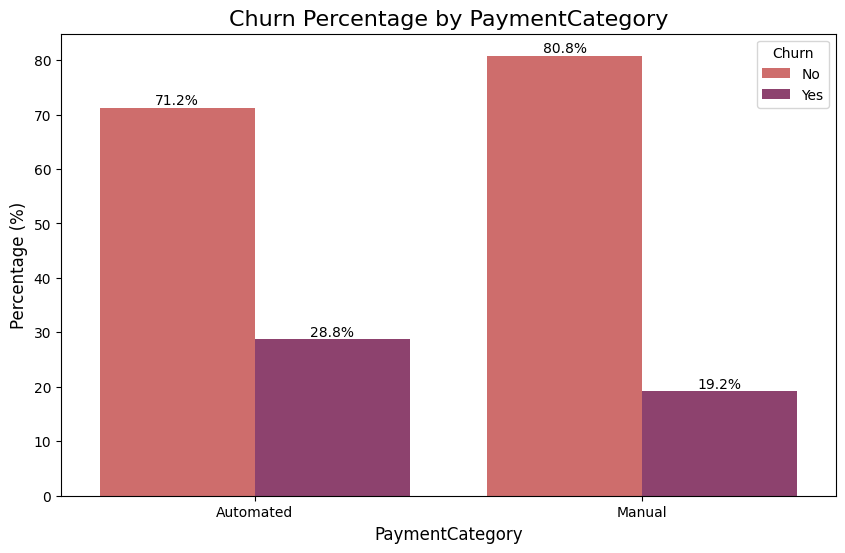

In [23]:
# Group the data by 'PaymentCategory' and 'Churn', then count the occurrences
PaymentCategory_counts = df.groupby(['PaymentCategory', 'Churn']).size().reset_index(name='Count')

# Calculate the percentage for each 'PaymentCategory' group
total_counts = PaymentCategory_counts.groupby('PaymentCategory')['Count'].transform('sum')
PaymentCategory_counts['Percentage'] = (PaymentCategory_counts['Count'] / total_counts) * 100

# Create a bar plot with percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=PaymentCategory_counts, x='PaymentCategory', y='Percentage', hue='Churn', palette='flare')

# Add percentages as labels on the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')  # Display labels as percentages (e.g., 50.0%)

# Add labels and title
plt.title('Churn Percentage by PaymentCategory', fontsize=16)
plt.xlabel('PaymentCategory', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Churn', fontsize=10)
plt.show()

The graph above clearly indicates that churn is higher for customers using automated payment methods compared to manual payment methods.

In [24]:
# Create FamilyStatus based on Partner and Dependents

def determine_family_status(row):
    if row['Partner'] == 'No' and row['Dependents'] == 'No':
        return 'Single'
    elif row['Partner'] == 'Yes' and row['Dependents'] == 'No':
        return 'Couple'
    elif row['Partner'] == 'Yes' and row['Dependents'] == 'Yes':
        return 'Family'
    else:
        return 'SingleParentFamily'

# Apply the function to the DataFrame
df['FamilyStatus'] = df.apply(determine_family_status, axis=1)

In [25]:
# Removing original column and will use FamilyStatus for analysis

df.drop(columns=['Partner', 'Dependents'], inplace=True)

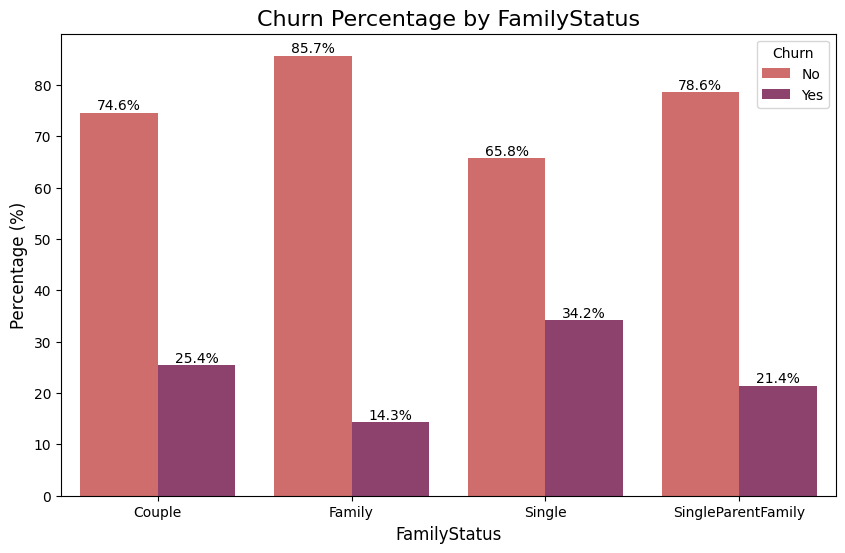

In [26]:
# Group the data by 'FamilyStatus' and 'Churn', calculate counts
FamilyStatus_counts = df.groupby(['FamilyStatus', 'Churn']).size().reset_index(name='Count')

# Calculate total counts for each 'FamilyStatus'
FamilyStatus_totals = FamilyStatus_counts.groupby('FamilyStatus')['Count'].transform('sum')

# Add a new column for the percentage
FamilyStatus_counts['Percentage'] = (FamilyStatus_counts['Count'] / FamilyStatus_totals) * 100

# Create a bar plot with percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=FamilyStatus_counts,
    x='FamilyStatus',
    y='Percentage',
    hue='Churn',
    palette='flare'
)

# Annotate bars with percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

# Add labels and title
plt.title('Churn Percentage by FamilyStatus', fontsize=16)
plt.xlabel('FamilyStatus', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Churn', fontsize=10)
plt.show()

The graph above clearly represents that customers who are single churn more, followed by couples, while families churn the least.

In [27]:
# Creating another column called HighMonthlyCharges with Boolean values and labelling customers who paid more than 50th percentile as 
# True for HighMonthlyCharges and False if they paid less than 50th percentile

# Define the threshold (e.g., median or 50th percentile)
threshold = df['MonthlyCharges'].quantile(0.50)

# Create the flag
df['HighMonthlyCharges'] = df['MonthlyCharges'] > threshold

# Preview the data
print(f"Threshold for HighMonthlyCharges: {threshold}")

Threshold for HighMonthlyCharges: 70.35


Result: Threshold for HighMonthlyCharges: 70.35

In [28]:
# Removing original column and will use HighMonthlyCharges for analysis

df.drop(columns=['MonthlyCharges'], inplace=True)

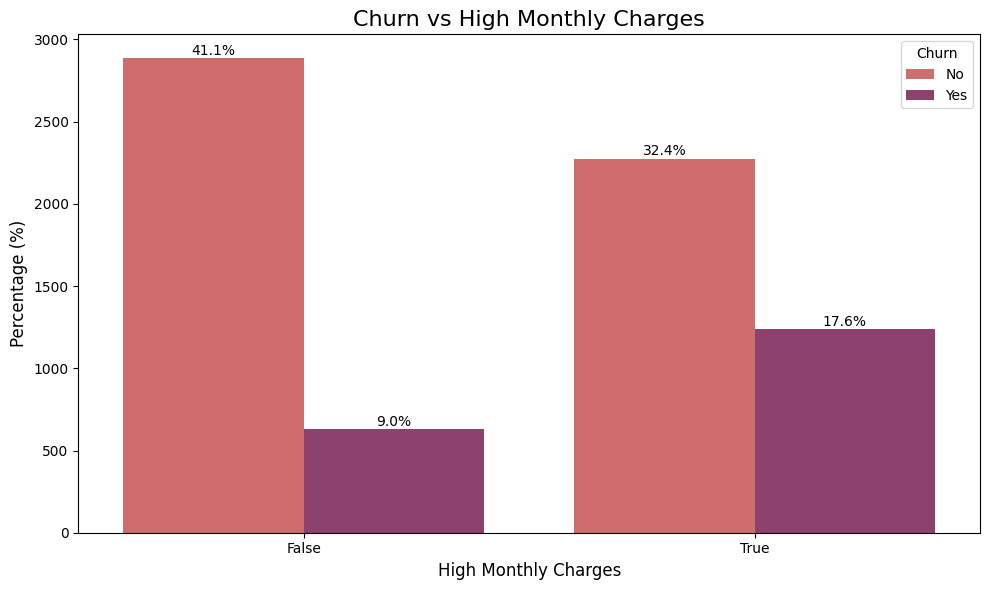

In [29]:
# Group the data by Churn and HighMonthlyCharges to count occurrences
churn_highcharge_counts = df.groupby(['Churn', 'HighMonthlyCharges']).size().reset_index(name='Count')

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=churn_highcharge_counts, x='HighMonthlyCharges', y='Count', hue='Churn', palette='flare')

# Calculate the total count for each group (Churn/Non-Churn)
total_count = churn_highcharge_counts['Count'].sum()

# Add percentage labels on the bars
for container in ax.containers:
    for rect in container:
        height = rect.get_height()
        if total_count > 0:
            percentage = (height / total_count) * 100
        else:
            percentage = 0  # Avoid division by zero
        
        # Format the percentage text
        percentage_text = f'{percentage:.1f}%'
        
        # Annotate the bar with the percentage
        ax.text(
            rect.get_x() + rect.get_width() / 2, height + 0.5, percentage_text,
            ha='center', va='bottom', fontsize=10
        )
# Add labels and title
plt.title('Churn vs High Monthly Charges', fontsize=16)
plt.xlabel('High Monthly Charges', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Churn', fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

Customers with High Monthly Charges as True churn more as compared to customers who don't pay high Monthly Charges. 

Hypothesis:
- Null Hypothesis: Average Monthly Charges has no effect on customer Churn.
- Alternative Hypothesis: Customers are more likely to churn if they pay high average charge.

In [30]:
# Calculate average monthly charges

df['AverageMonthlyCharges'] = df['TotalCharges'] / df['tenure']

In [31]:
df.head(5)

,gender,SeniorCitizen,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,TotalCharges,Churn,PaymentCategory,FamilyStatus,HighMonthlyCharges,AverageMonthlyCharges
0,Female,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,29.85,No,Automated,Couple,False,29.850000
1,Male,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,1889.50,No,Manual,Single,False,55.573529
2,Male,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,108.15,Yes,Manual,Single,False,54.075000
3,Male,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,1840.75,No,Automated,Single,False,40.905556
4,Female,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,151.65,Yes,Automated,Single,True,75.825000


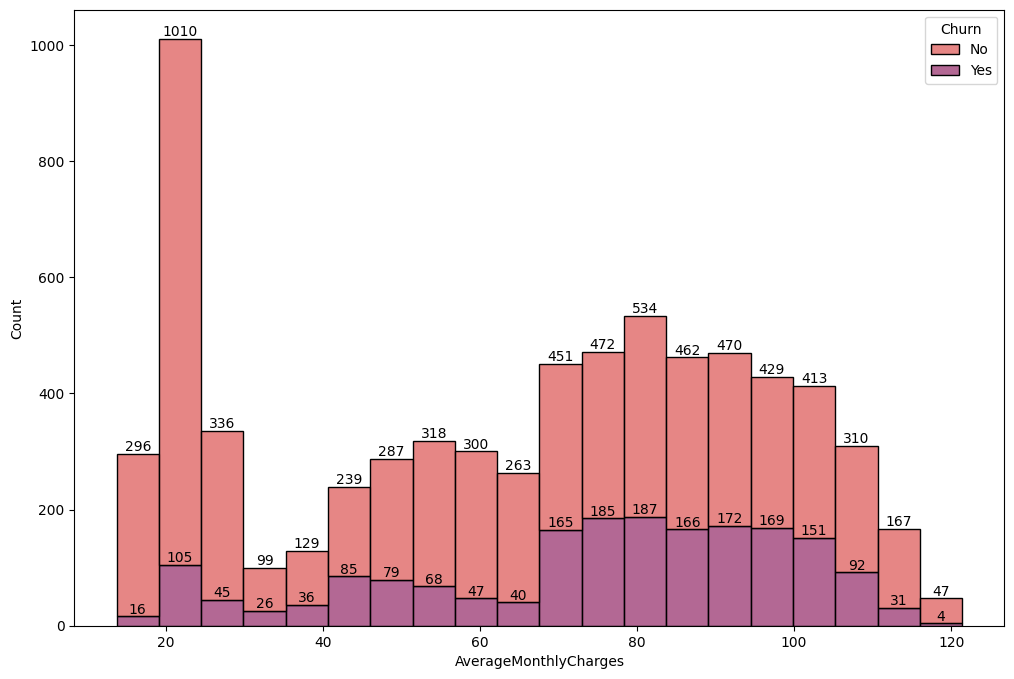

In [32]:
# Filter data for churned and non-churned customers
churned = df[df['Churn'] == 'Yes']['AverageMonthlyCharges']
non_churned = df[df['Churn'] == 'No']['AverageMonthlyCharges']

plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x="AverageMonthlyCharges", hue="Churn", multiple="stack", palette='flare')
for container in ax.containers:
    ax.bar_label(container)

The graph above is a stacked histogram of churn vs non churn for average monthly charges. It shows a non symmetric distribution. In order to further verify the spread, we performed some statistical tests. 

In [33]:
# CLUSTER AverageMonthlyCharges

#providing a random state
random_state = 90

def drawSSEPlot(df, columns=[], n_clusters=10, max_iter=300):
    df = df.loc[:, df.columns.isin(columns)]
    inertia_values = []
    for i in range(1, n_clusters+1):
        km = KMeans(n_clusters=i, max_iter=max_iter, random_state=random_state)
        km.fit_predict(df)
        inertia_values.append(km.inertia_)
    fig, ax = plt.subplots(figsize=(8, 6))
    plt.plot(range(1, n_clusters+1), inertia_values, color='red')
    plt.xlabel('No. of Clusters', fontsize=15)
    plt.ylabel('SSE / Inertia', fontsize=15)
    plt.title('SSE / Inertia vs No. Of Clusters', fontsize=15)
    plt.grid()
    plt.show()

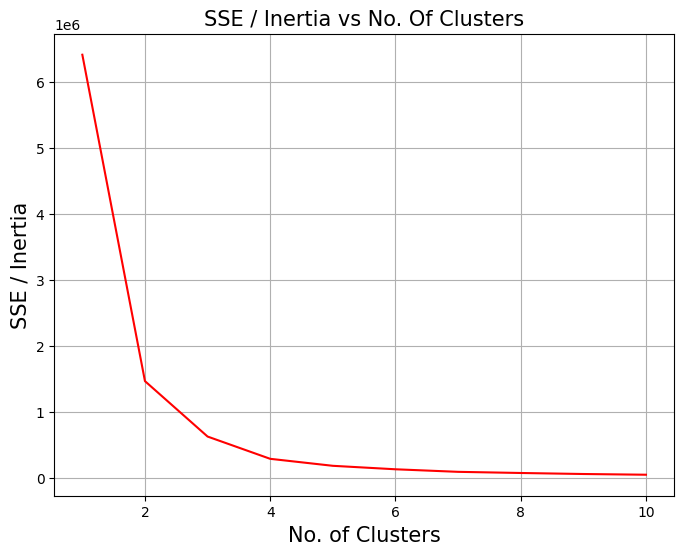

In [34]:
drawSSEPlot(df, columns=['AverageMonthlyCharges'])
# Choose 3 as the optimal number of Clusters based on SSE plot

We used clustering to label customers as High, Mid and Low Average Monthly Charge users (n=3 is based on elbow method)

In [35]:
# use kmeans clustering to assign clusters to each value

kmeans = KMeans(n_clusters=3, random_state=random_state, n_init="auto").fit(df.loc[:, ['AverageMonthlyCharges']])

df['AvgMonthlyChargesCluster'] = kmeans.labels_
a = [0, 1, 2]
b = ['Low', 'Mid', 'High']

df['AvgMonthlyChargesCluster'] = df['AvgMonthlyChargesCluster'].map(dict(zip(a, b))).astype('category')
df.drop(columns=['AverageMonthlyCharges'], inplace=True)

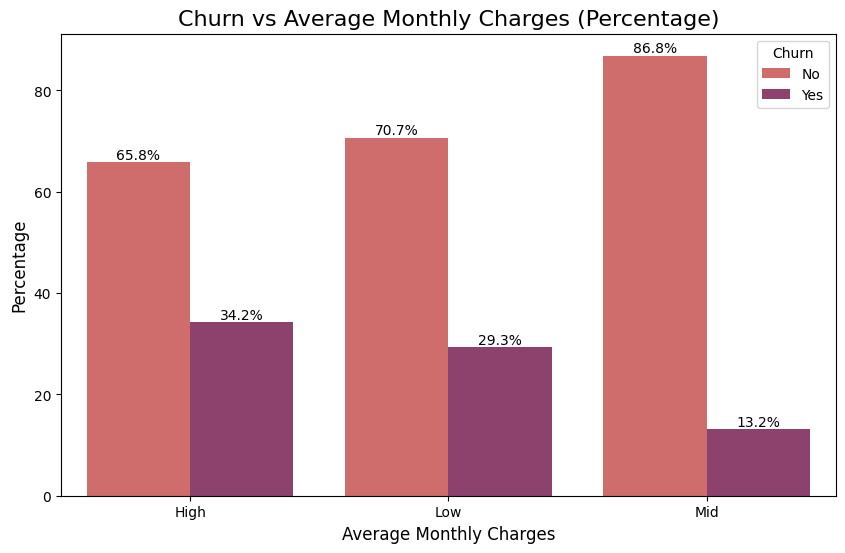

In [36]:
# Group the data by Churn and AvgMonthlyChargesCluster to count occurrences
churn_avgcharge_counts = df.groupby(['Churn', 'AvgMonthlyChargesCluster']).size().reset_index(name='Count')

# Calculate the total count for each AvgMonthlyChargesCluster group
total_counts = churn_avgcharge_counts.groupby('AvgMonthlyChargesCluster')['Count'].transform('sum')

# Convert the count to percentage
churn_avgcharge_counts['Percentage'] = (churn_avgcharge_counts['Count'] / total_counts) * 100

# Create a bar plot with percentages
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=churn_avgcharge_counts, x='AvgMonthlyChargesCluster', y='Percentage', hue='Churn', palette='flare')

# Adding the percentages on top of the bars
for container in ax.containers:
    ax.bar_label(container, labels=[f'{x:.1f}%' for x in container.datavalues])

# Add labels and title
plt.title('Churn vs Average Monthly Charges (Percentage)', fontsize=16)
plt.xlabel('Average Monthly Charges', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Churn', fontsize=10)
plt.show()

- The above graph indicates that customers who are paying either very high or very low average monthly charges churn more. Customers with high average monthly charges are the most at risk. While they bring in more revenue, they are also likelier to leave, potentially causing significant revenue loss. This signals a need for proactive retention strategies like loyalty rewards, exclusive perks etc.
- The group with low average monthly charges are relatively price-sensitive and may feel underserved. They may churn for better deals or improved features elsewhere. Efforts like budget-friendly enhancements or small upselling campaigns can help retain this segment.

In [37]:
# Statistical tests to test hypothesis:

# Check Assumptions for Normality

# 1. Normality Test
stat_churn, p_churn = stats.shapiro(churned)
stat_non_churn, p_non_churn = stats.shapiro(non_churned)
print(f"Shapiro-Wilk Test (Churned): p-value = {p_churn}")
print(f"Shapiro-Wilk Test (Non-Churned): p-value = {p_non_churn}")

Shapiro-Wilk Test (Churned): p-value = 8.642279629282684e-28
Shapiro-Wilk Test (Non-Churned): p-value = 4.541682054760433e-46


Result: p-values less than 0.05 indicate that data is not normally distributed.

In [38]:
# 2. Variance Equality Test

stat_var, p_var = stats.levene(churned, non_churned)
print(f"Levene’s Test: p-value = {p_var}")

Levene’s Test: p-value = 2.0788513862059093e-72


Result: p-value less than 0.05 indicate that variances are unequal. 

In [39]:
# 3. Perform the appropriate test for given data

if p_churn > 0.05 and p_non_churn > 0.05:  # Both groups are normal
    if p_var > 0.05:  # Equal variances
        stat, p = stats.ttest_ind(churned, non_churned, alternative='greater')
        print("Using t-test (equal variances)")
    else:  # Unequal variances
        stat, p = stats.ttest_ind(churned, non_churned, equal_var=False, alternative='greater')
        print("Using t-test (unequal variances)")
else:  # Non-normal data
    stat, p = stats.mannwhitneyu(churned, non_churned, alternative='greater')
    print("Using Mann-Whitney U Test (non-parametric)")

Using Mann-Whitney U Test (non-parametric)


Result: Since data is not distributed normally, used Mann-Whitney U Test

In [40]:
# 4. Interpret Results
print(f"Test Statistic = {stat}, p-value = {p}")
if p <= 0.05:
    print("Reject the null hypothesis: Customers with higher average monthly charges are more likely to churn.")
else:
    print("Fail to reject the null hypothesis: No evidence that average monthly charges influence churn.")

Test Statistic = 5988386.0, p-value = 2.669381417839726e-54
Reject the null hypothesis: Customers with higher average monthly charges are more likely to churn.


Result: Since the p-value is less than 0.05, we reject the null hypothesis and conclude that customers with higher average monthly charges are more likely to churn.



Data Modeling



In [41]:
# Scaling numerical features

scaler = StandardScaler()
num_cols = ['tenure', 'TotalCharges']
df[num_cols] = scaler.fit_transform(df[num_cols])

In [42]:
# Listing categorical features for analysis

cat_features= ['gender','SeniorCitizen','PhoneService','MultipleLines',
               'InternetService','OnlineSecurity', 'OnlineBackup','DeviceProtection','TechSupport',
               'StreamingTV','StreamingMovies','Contract','PaperlessBilling',
              'PaymentCategory', 'HighMonthlyCharges','FamilyStatus', 'AvgMonthlyChargesCluster']

In [43]:
# Assigning X and y variables.

y = df['Churn']
X = df.drop(columns='Churn')

In [44]:
# Dummification of categorical columns

X_dummified = pd.get_dummies(X, columns= cat_features)
X_dummified.head(5)

,tenure,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,...,PaymentCategory_Manual,HighMonthlyCharges_False,HighMonthlyCharges_True,FamilyStatus_Couple,FamilyStatus_Family,FamilyStatus_Single,FamilyStatus_SingleParentFamily,AvgMonthlyChargesCluster_High,AvgMonthlyChargesCluster_Low,AvgMonthlyChargesCluster_Mid
0,-1.280248,-0.994194,True,False,True,False,True,False,False,True,...,False,True,False,True,False,False,False,False,False,True
1,0.064303,-0.173740,False,True,True,False,False,True,True,False,...,True,True,False,False,False,True,False,False,True,False
2,-1.239504,-0.959649,False,True,True,False,False,True,True,False,...,True,True,False,False,False,True,False,False,True,False
3,0.512486,-0.195248,False,True,True,False,True,False,False,True,...,False,True,False,False,False,True,False,False,False,True
4,-1.239504,-0.940457,True,False,True,False,False,True,True,False,...,False,False,True,False,False,True,False,False,True,False


In [45]:
# Perform data splitting
# Split the data: 80% training and 20% test
X_train_val, X_test, y_train_val, y_test = train_test_split(X_dummified, y, test_size=0.20, random_state=random_state)

# Further split the temporary set into 75% train and 25% val
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=random_state)

In [46]:
y_train_val.value_counts()

Churn
No     4114
Yes    1511
Name: count, dtype: int64

In [47]:
y_test.value_counts()

Churn
No     1049
Yes     358
Name: count, dtype: int64

In [48]:
#create variable to store and compare results of all models

model_results = []

In [49]:
# Defining a function to evaluate a trained sklearn model on the test set, print classification scores, and plot the confusion matrix.

def evaluate_model(model, X_test, y_test, class_labels=None, pos_label=None):
    """
    Evaluates a trained sklearn model on the test set, prints classification scores,
    and plots the confusion matrix.
    
    Parameters:
    - model: Trained sklearn classification model.
    - X_test: Features of the test dataset.
    - y_test: True labels of the test dataset.
    - class_labels: List of class labels for the confusion matrix (optional).
    """
    # Predict the test set
    y_pred = model.predict(X_test)
    
    # If class_labels is None, infer from y_test
    if class_labels is None:
        class_labels = np.unique(y_test).astype(str)
    
    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=pos_label)
    # recall = recall_score(y_test, y_pred, pos_label=pos_label)
    f1 = f1_score(y_test, y_pred, pos_label=pos_label)
    
    # Print classification scores
    print("Classification Metrics:")
    print(f"Accuracy:  {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score:  {f1:.2f}")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted Label", fontsize=14)
    plt.ylabel("True Label", fontsize=14)
    plt.show()

    tn, fp, fn, tp = cm.ravel()

    tpr = tp / (tp + fn)  # Sensitivity
    fpr = fp / (fp + tn)
    tnr = tn / (tn + fp)  # Specificity
    fnr = fn / (fn + tp)
    return {
        'acc': accuracy,
        'precision': precision,
        'f1_score': f1,
        'tpr': tpr,
        'fpr': fpr,
        'tnr': tnr,
        'fnr': fnr,
    }

Classification Metrics:
Accuracy:  0.81
Precision: 0.64
F1 Score:  0.60


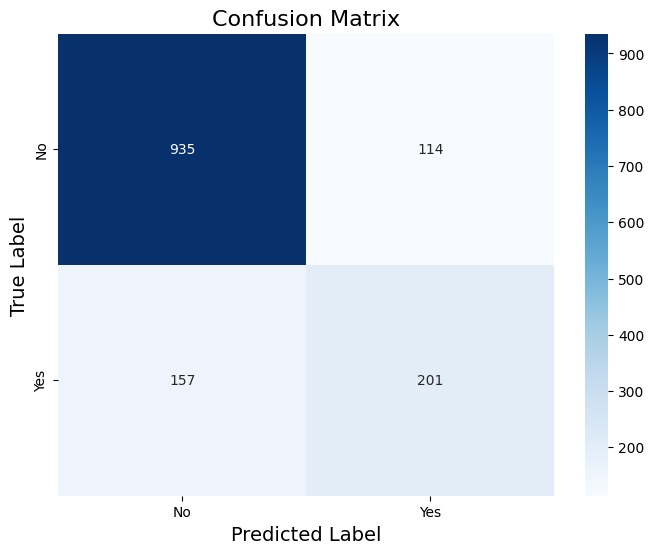

In [50]:
# Logistic regression cross validation with l2 penalty and accuracy score

model = LogisticRegressionCV(Cs=10, cv=5, scoring='accuracy', random_state=random_state)
model.fit(X_train_val, y_train_val)
result = evaluate_model(model, X_test, y_test, pos_label="Yes")
result['model_name'] = 'lr_l2_acc'
model_results.append(result)

Classification Metrics:
Accuracy:  0.81
Precision: 0.64
F1 Score:  0.60


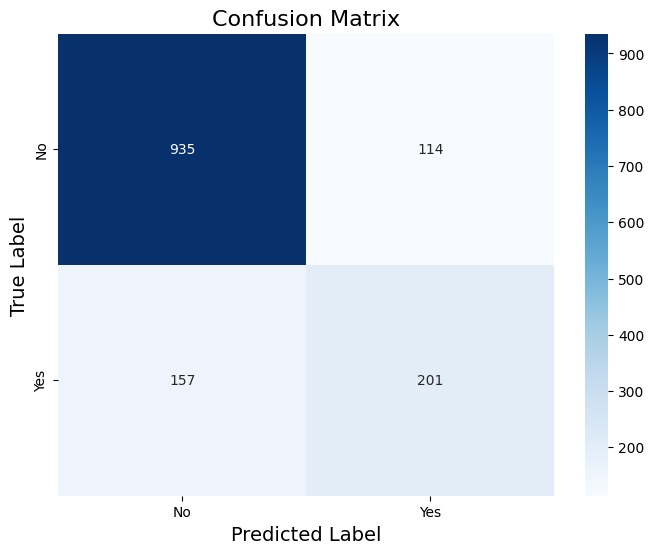

In [51]:
# Logistic regression cross validation with l2 penalty and f1 score

model = LogisticRegressionCV(Cs=10, cv=5, scoring='f1', random_state=random_state)
model.fit(X_train_val, y_train_val)
result = evaluate_model(model, X_test, y_test, pos_label="Yes")
result['model_name'] = 'lr_l2_f1'
model_results.append(result)

Classification Metrics:
Accuracy:  0.81
Precision: 0.64
F1 Score:  0.60


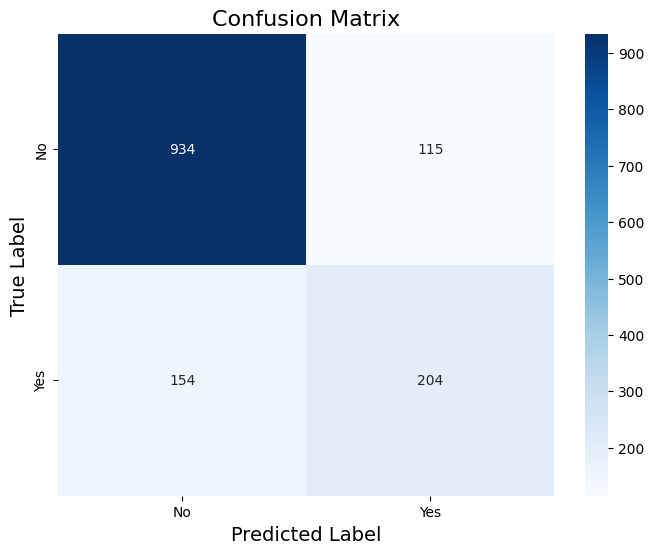

In [52]:
# Logistic regression cross validation with l2 penalty and roc_auc scoring

model = LogisticRegressionCV(Cs=10, cv=5, scoring='roc_auc', random_state=random_state)
model.fit(X_train_val, y_train_val)
result = evaluate_model(model, X_test, y_test, pos_label="Yes")
result['model_name'] = 'lr_l2_roc_auc'
model_results.append(result)

Classification Metrics:
Accuracy:  0.81
Precision: 0.67
F1 Score:  0.60


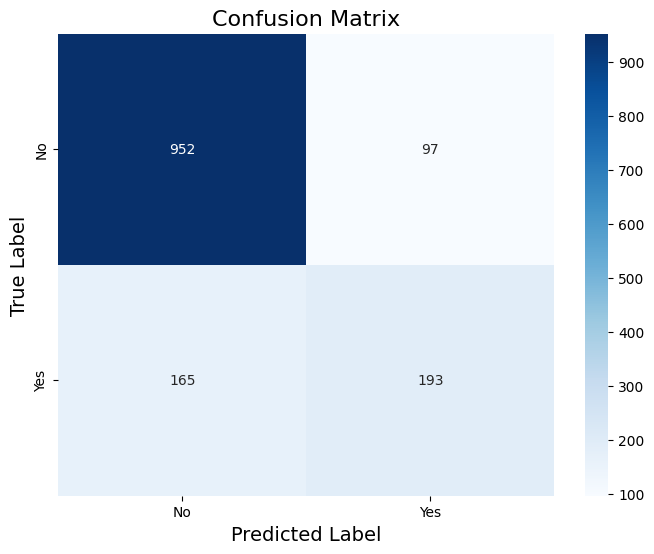

In [53]:
# Logistic regression cross validation with l1 penalty and accuracy score

model = LogisticRegressionCV(Cs=10, cv=5, scoring='accuracy', solver='liblinear', penalty='l1', random_state=random_state)
model.fit(X_train_val, y_train_val)
result = evaluate_model(model, X_test, y_test, pos_label="Yes")
result['model_name'] = 'lr_l1_acc'
model_results.append(result)

Classification Metrics:
Accuracy:  0.81
Precision: 0.64
F1 Score:  0.60


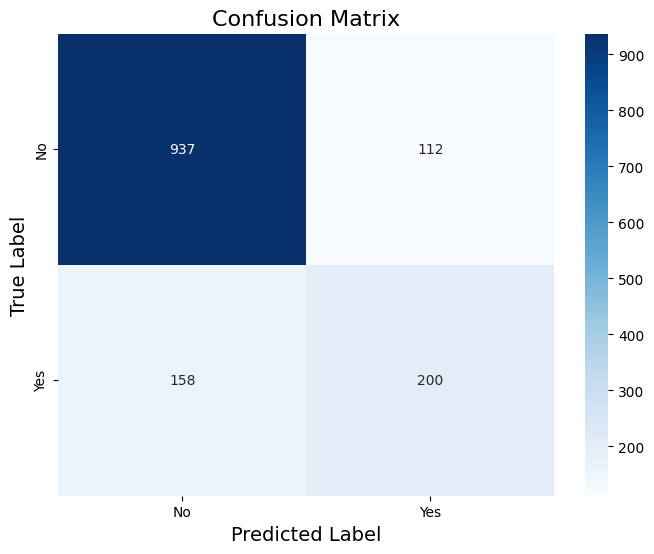

In [54]:
# Logistic regression cross validation with l1 penalty and f1 score

model = LogisticRegressionCV(Cs=10, cv=5, scoring='f1', solver='liblinear', penalty='l1', random_state=random_state)
model.fit(X_train_val, y_train_val)
result = evaluate_model(model, X_test, y_test, pos_label="Yes")
result['model_name'] = 'lr_l1_f1'
model_results.append(result)

Classification Metrics:
Accuracy:  0.81
Precision: 0.64
F1 Score:  0.60


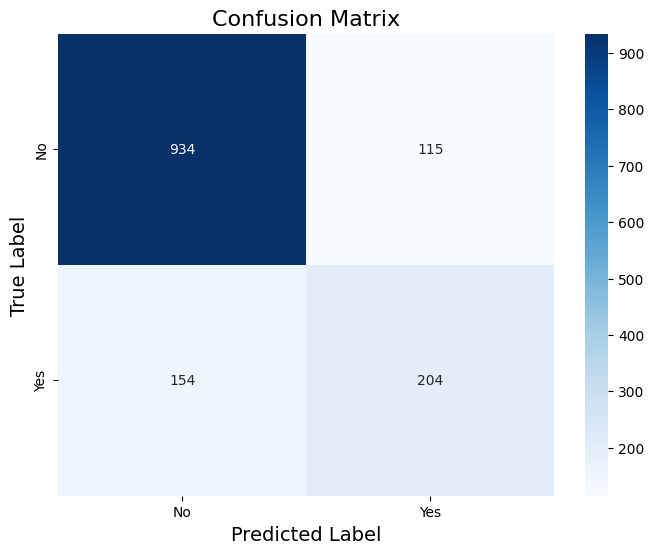

In [55]:
# Logistic regression cross validation with l1 penalty and roc_auc score

model = LogisticRegressionCV(Cs=10, cv=5, scoring='roc_auc', solver='liblinear', penalty='l1', random_state=random_state)
model.fit(X_train_val, y_train_val)
result = evaluate_model(model, X_test, y_test, pos_label="Yes")
result['model_name'] = 'lr_l1_roc_auc'
model_results.append(result)

Classification Metrics:
Accuracy:  0.81
Precision: 0.64
F1 Score:  0.60


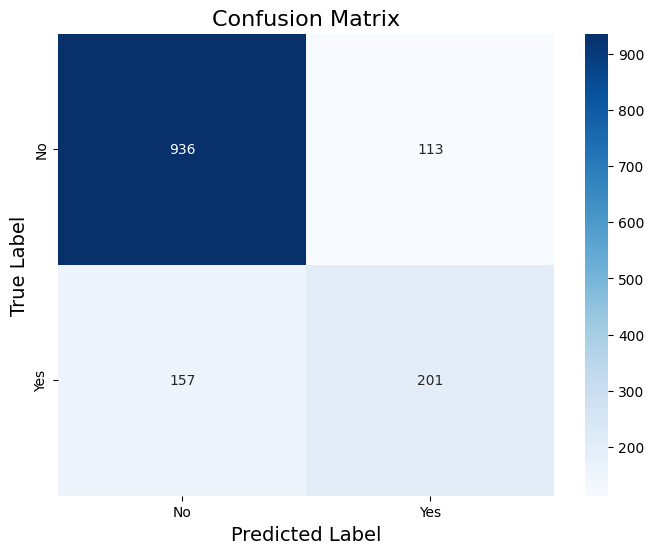

In [56]:
# Logistic regression cross validation with elasticnet penalty and accuracy score

model = LogisticRegressionCV(Cs=10, cv=5, scoring='accuracy', solver='saga', penalty='elasticnet',
                             l1_ratios=np.logspace(-1, 0, 10), random_state=random_state, n_jobs=-1)
model.fit(X_train_val, y_train_val)
result = evaluate_model(model, X_test, y_test, pos_label="Yes")
result['model_name'] = 'lr_elasticnet_acc'
model_results.append(result)

Classification Metrics:
Accuracy:  0.81
Precision: 0.64
F1 Score:  0.60


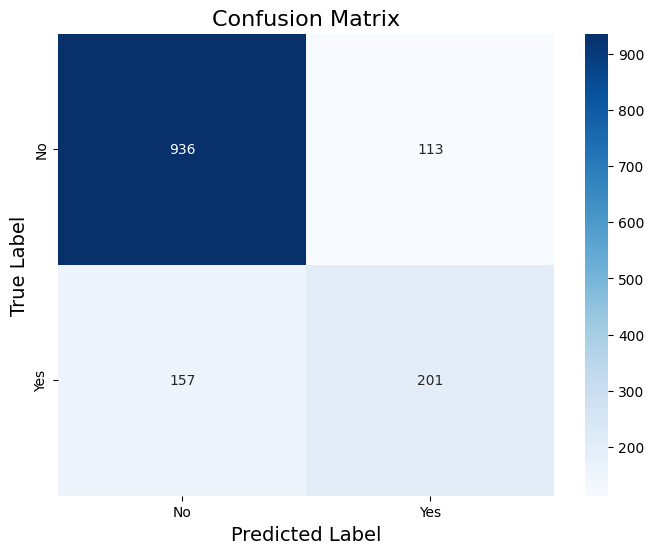

In [57]:
# Logistic regression cross validation with elasticnet penalty and f1 score

model = LogisticRegressionCV(Cs=10, cv=5, scoring='f1', solver='saga', penalty='elasticnet',
                             l1_ratios=np.logspace(-1, 0, 10), random_state=random_state, n_jobs=-1)
model.fit(X_train_val, y_train_val)
result = evaluate_model(model, X_test, y_test, pos_label="Yes")
result['model_name'] = 'lr_elasticnet_f1'
model_results.append(result)

Classification Metrics:
Accuracy:  0.81
Precision: 0.64
F1 Score:  0.60


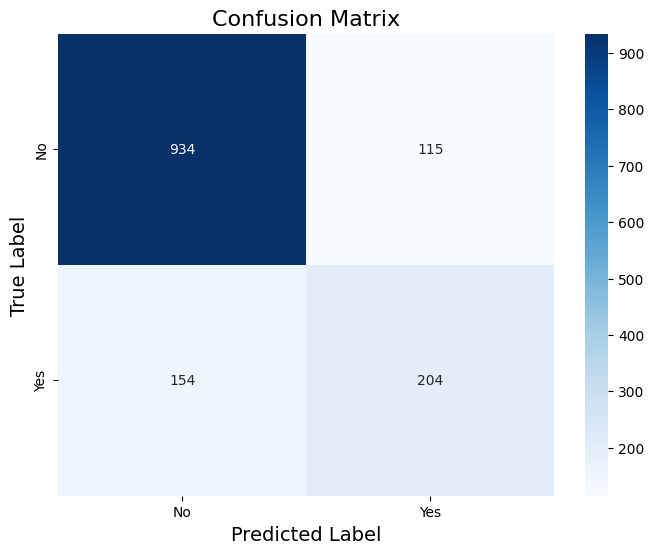

In [58]:
# Logistic regression cross validation with elasticnet penalty and roc_auc score

model = LogisticRegressionCV(Cs=10, cv=5, scoring='roc_auc', solver='saga', penalty='elasticnet',
                             l1_ratios=np.logspace(-1, 0, 10), random_state=random_state, n_jobs=-1)
model.fit(X_train_val, y_train_val)
result = evaluate_model(model, X_test, y_test, pos_label="Yes")
result['model_name'] = 'lr_elasticnet_roc_auc'
model_results.append(result)

In [59]:
# XGBoost classifier with hyperparameter tuning and f1 accuracy

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=random_state, verbosity = 0)

le = LabelEncoder()
y_train_val_encoded = le.fit_transform(y_train_val)
y_test_encoded = le.transform(y_test)


# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of trees
    'learning_rate': [0.01, 0.1, 0.2],     # Step size shrinkage
    'max_depth': [3, 5, 7],                # Maximum depth of a tree
    'subsample': [0.8, 1.0],               # Subsample ratio
    'colsample_bytree': [0.8, 1.0],        # Subsample ratio of columns
    'gamma': [0, 1, 5]                     # Minimum loss reduction
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(
    estimator=xgb_model, 
    param_grid=param_grid, 
    scoring='f1', 
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_val, y_train_val_encoded)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Evaluate the model on the test set
best_model_gb = grid_search.best_estimator_

Best Parameters: {'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.5868769722169572


For XGBoost classifier-
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 5, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Best Cross-Validation Accuracy: 0.5868769722169572

Classification Metrics:
Accuracy:  0.81
Precision: 0.67
F1 Score:  0.60


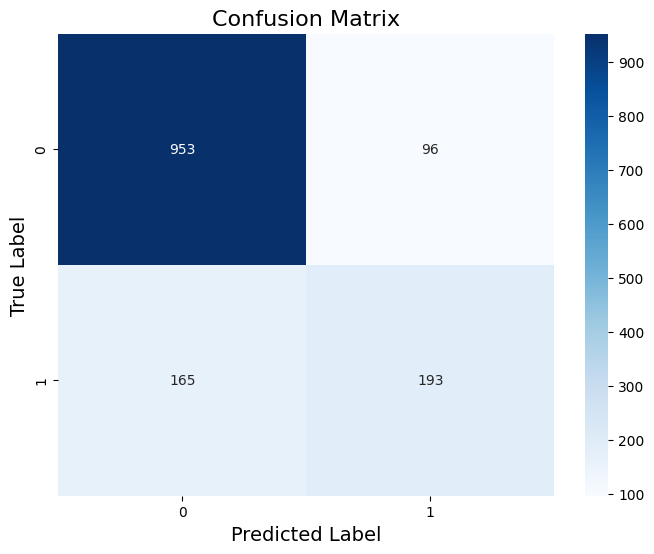

In [60]:
# XGBoost evaluation on test set

result = evaluate_model(best_model_gb, X_test, y_test_encoded, pos_label=1)
result['model_name'] = 'xgboost'
model_results.append(result)

In [61]:
# Naive Bayes classifier with hyperparameter tuning and f1 accuracy

gnb = GaussianNB()
# Define parameter grid for GridSearchCV
param_grid = {
    'var_smoothing': np.logspace(0,-9, num=100),
}
# Initialize GridSearchCV with 5-fold cross-validation
grid_search_gnb = GridSearchCV(
    estimator=gnb, 
    param_grid=param_grid, 
    scoring='f1', 
    cv=5,
    n_jobs=-1
)

grid_search_gnb.fit(X_train_val, y_train_val_encoded)

# Get the best parameters and best score
print("Best Parameters:", grid_search_gnb.best_params_)
print("Best Cross-Validation Accuracy:", grid_search_gnb.best_score_)

# Evaluate the model on the test set
best_gnb_model = grid_search_gnb.best_estimator_

Best Parameters: {'var_smoothing': 1.0}
Best Cross-Validation Accuracy: 0.6089018354255973


For Naive Bayes-
Best Parameters: {'var_smoothing': 1.873817422860383e-07}
Best Cross-Validation Accuracy: 0.5967914222796767

Classification Metrics:
Accuracy:  0.75
Precision: 0.51
F1 Score:  0.63


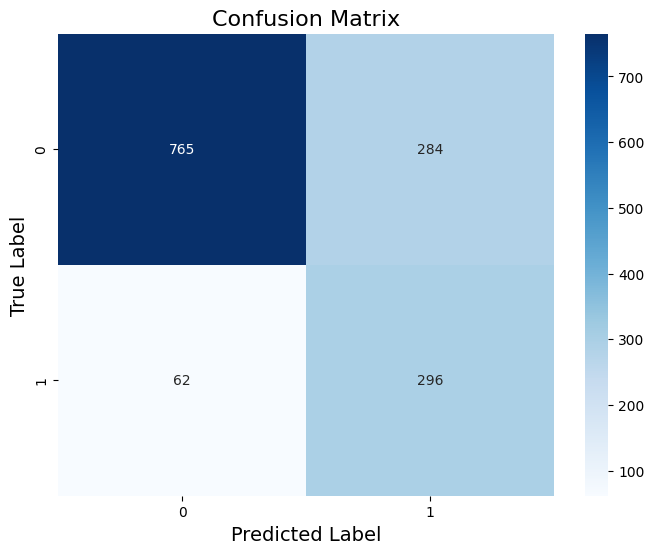

In [62]:
# Naive Bayes Evaluation on test set

result = evaluate_model(best_gnb_model, X_test, y_test_encoded, pos_label=1)
result['model_name'] = 'NaiveBayes'
model_results.append(result)

In [63]:
# Putting all scores in one table for comparison

scores_df = pd.DataFrame(model_results)
col = scores_df.pop("model_name")
scores_df.insert(0, col.name, col)
scores_df

,model_name,acc,precision,f1_score,tpr,fpr,tnr,fnr
0,lr_l2_acc,0.807392,0.638095,0.597325,0.561453,0.108675,0.891325,0.438547
1,lr_l2_f1,0.807392,0.638095,0.597325,0.561453,0.108675,0.891325,0.438547
2,lr_l2_roc_auc,0.808813,0.639498,0.602659,0.569832,0.109628,0.890372,0.430168
3,lr_l1_acc,0.813788,0.665517,0.595679,0.539106,0.092469,0.907531,0.460894
4,lr_l1_f1,0.808102,0.641026,0.597015,0.558659,0.106768,0.893232,0.441341
5,lr_l1_roc_auc,0.808813,0.639498,0.602659,0.569832,0.109628,0.890372,0.430168
6,lr_elasticnet_acc,0.808102,0.640127,0.598214,0.561453,0.107722,0.892278,0.438547
7,lr_elasticnet_f1,0.808102,0.640127,0.598214,0.561453,0.107722,0.892278,0.438547
8,lr_elasticnet_roc_auc,0.808813,0.639498,0.602659,0.569832,0.109628,0.890372,0.430168
9,xgboost,0.814499,0.667820,0.596600,0.539106,0.091516,0.908484,0.460894


XGBoost performs best due to its combination of accuracy (81.4%), precision, recall, and F1 score, ensuring a reliable and well-balanced classification of both positive and negative outcomes. But it comes extremely close in comparison with logistic regression accuracy with lasso penalty (81.3%). Both model’s high TNR ensure that they don't falsely label negative cases as positive, while their low FNR ensure they don’t miss many positive cases.

In [64]:
# Plot feature importance from the array of feature importances.

def plot_feature_importance(feature_importance, columns):
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    fig = plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.barh(pos, feature_importance[sorted_idx], align="center")
    plt.yticks(pos, np.array(columns)[sorted_idx])
    plt.title("Feature Importance (MDI)")

    fig.tight_layout()
    plt.show()

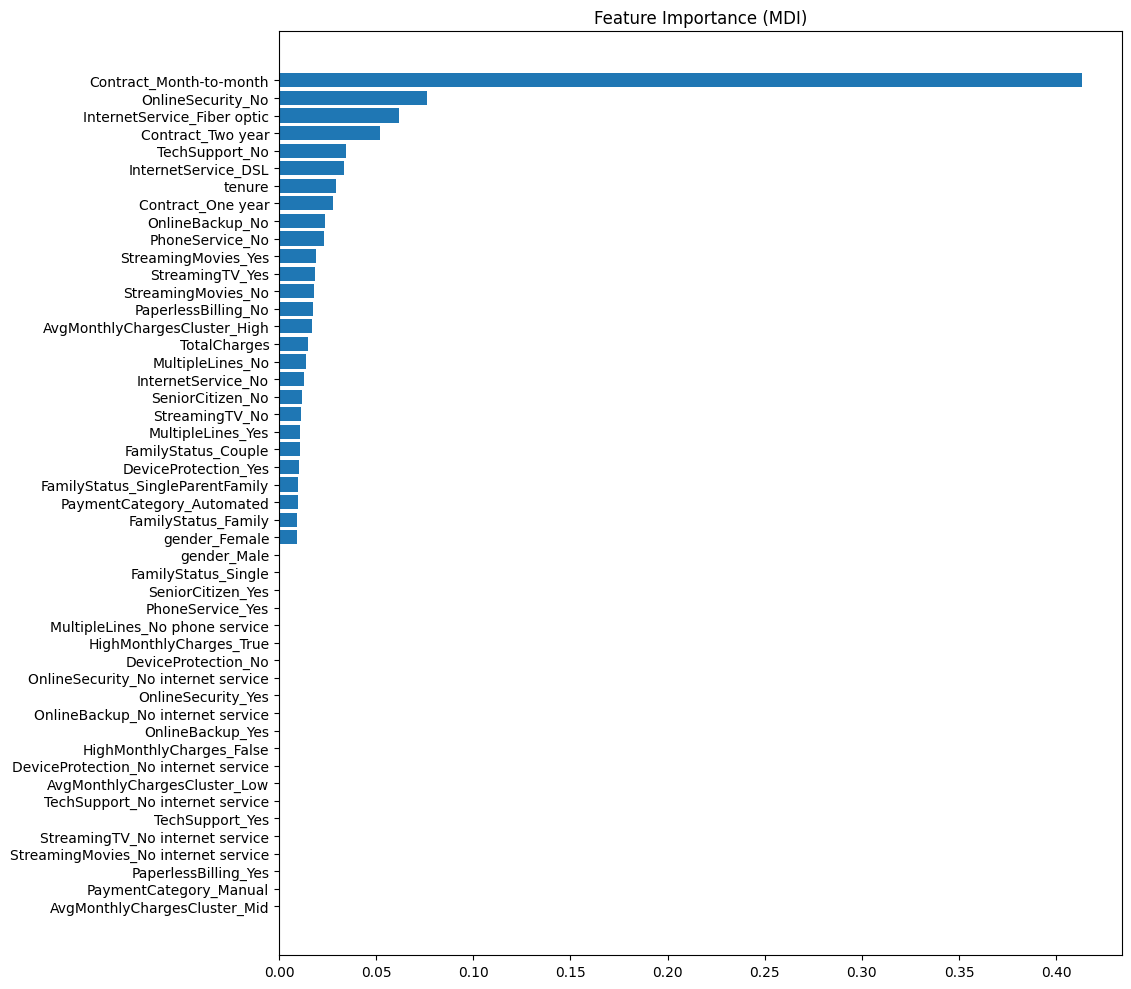

In [65]:
# Plot feature importances for Gradient Boosting.
plot_feature_importance(best_model_gb.feature_importances_, X_dummified.columns)

The top 5 features that contribute to Customer Churn are:
1) Month on month Contract
2) No Online Security
3) Fiber optic as internet service
4) Two year Contract
5) No tech support

Marketing Strategies:

Targeting Senior Citizens: We saw that non-senior citizens are more likely to churn. Efforts should be focused on understanding and addressing the needs and preferences of non-senior citizens to enhance retention among this demographic segment.

Internet Service Type: The coefficients for "Internet_service_fibre_optic" suggests that customers with fiber optic internet service are more likely to churn compared to DSL users. Marketing efforts should focus on addressing issues specific to fiber optic service, such as reliability, speed, and pricing, to improve customer satisfaction and retention. Promoting the benefits of DSL service or offering incentives for switching to DSL could also be considered.

Online Security and Tech Support: The customers without online security and tech support are more likely to churn. Offering promotions or packages that include online security and tech support can encourage customers to opt for these services, leading to improved retention.

Phone Service and Multiple Lines: Customers with phone service and without multiple lines are less likely to churn. Strategies should highlight the value and features of phone services, as well as offer incentives for customers to consolidate their lines or upgrade their phone services to reduce churn risk.

High Monthly Charges: Implement a churn risk scoring model for high-paying customers and offer exclusive benefits, loyalty rewards, or temporary discounts to retain them.

Month-to-Month Contracts: Customers on month-to-month contracts are more likely to churn compared to those on two-year contracts. Encourage customers on month-to-month contracts to switch to long-term plans with targeted promotions, such as discounts for annual subscriptions or value-added service bundles.  